# Task 1: Linear Regression – House Price Prediction (Kaggle Dataset)

This notebook implements a complete Machine Learning workflow using the **Kaggle California Housing CSV dataset**.

### Workflow
- Load CSV data
- Exploratory Data Analysis (EDA)
- Data cleaning (missing values)
- Train-test split
- Linear Regression model training
- Model evaluation (MAE, RMSE, R²)


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

## Load Kaggle CSV Dataset

In [37]:
# Make sure 'housing.csv' is in the same folder as this notebook

df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Dataset Overview

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [39]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Check & Handle Missing Values

In [40]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [41]:
# Fill missing values in total_bedrooms with median
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Exploratory Data Analysis (EDA)

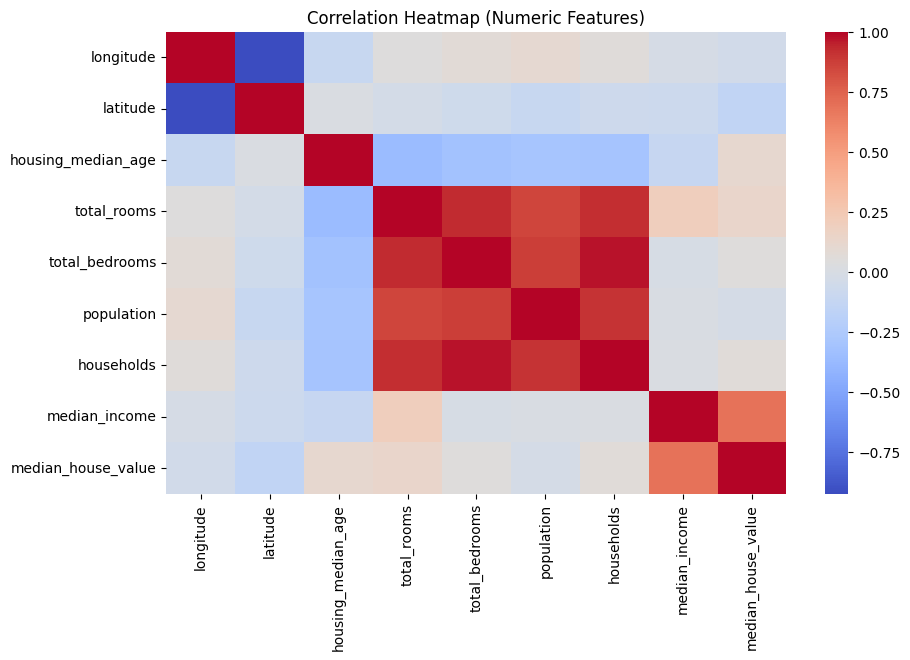

In [42]:
plt.figure(figsize=(10,6))

numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), cmap='coolwarm')

plt.title('Correlation Heatmap (Numeric Features)')
plt.show()


## Train–Test Split

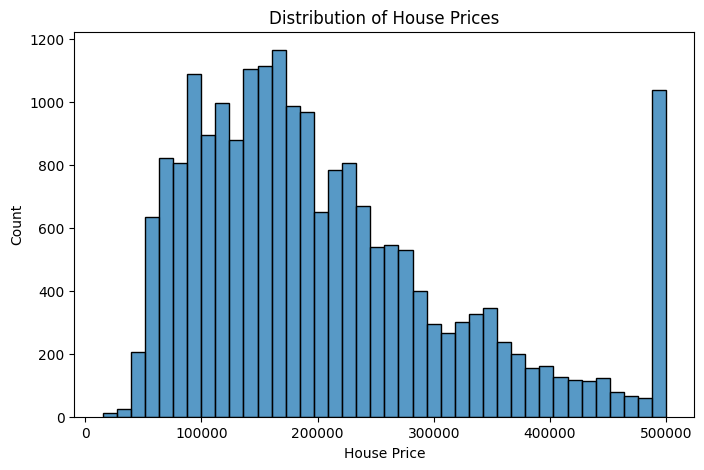

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(df['median_house_value'], bins=40)
plt.title('Distribution of House Prices')
plt.xlabel('House Price')
plt.ylabel('Count')
plt.show()


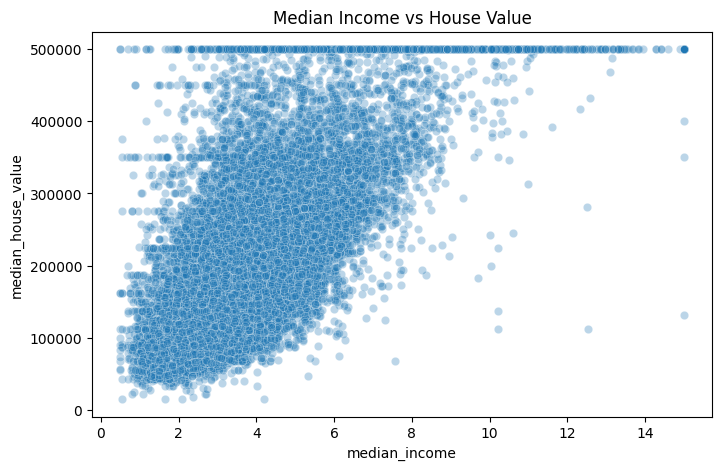

In [44]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=df['median_income'],
    y=df['median_house_value'],
    alpha=0.3
)
plt.title('Median Income vs House Value')
plt.show()


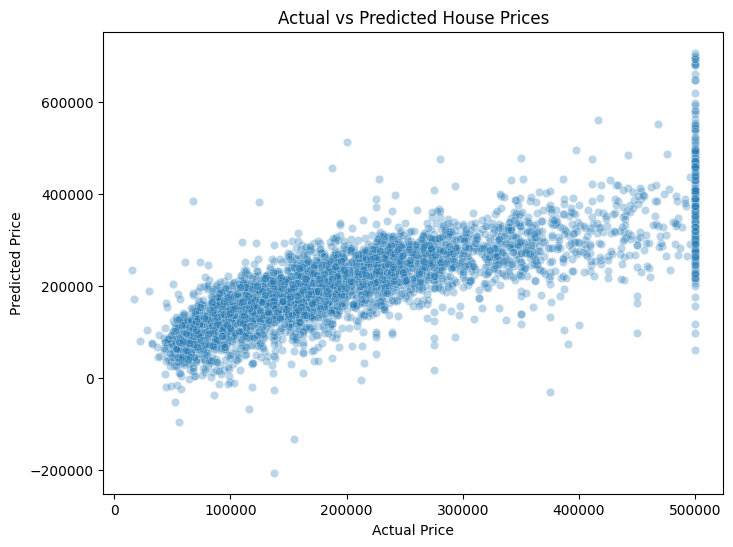

In [45]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()


In [46]:


X = df.drop('median_house_value', axis=1)
y = df['median_house_value']


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)


ValueError: could not convert string to float: 'NEAR OCEAN'

## Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R² Score: {r2:.3f}')

MAE: 51810.48
RMSE: 71133.17
R² Score: 0.614


## Save Model 

In [ ]:
import pickle

with open('linear_regression_kaggle.pkl', 'wb') as f:
    pickle.dump(model, f)

print('Model saved as linear_regression_kaggle.pkl')

Model saved as linear_regression_kaggle.pkl


## Future Improvements

Although the current Linear Regression model provides a reasonable baseline for house price prediction, several improvements can be explored to enhance performance and robustness:

- Feature Engineering: Create new features or apply transformations (e.g., log transformation, interaction terms) to better capture relationships in the data.
- Polynomial Regression: Introduce polynomial features to model non-linear patterns in house prices.
- Regularization Techniques: Apply Ridge or Lasso regression to reduce overfitting and handle multicollinearity.
- Outlier Handling: Detect and remove or cap extreme values that may negatively affect model performance.
- Model Comparison: Experiment with advanced models such as Decision Trees, Random Forests, or Gradient Boosting and compare their performance with Linear Regression.

These steps can help improve prediction accuracy and provide deeper insights into the factors affecting house prices.
